In [2]:
%matplotlib inline

import numpy as np
import math
import cv2
from matplotlib import pyplot as plt

# Задание 1
 На нарисованном вами при выполнении лабораторной работы 2 изображении найти выделить контуры всех прямоугольников синим цветом, круглых фигур – зеленым цветом. Используя моменты, посчитать и вывести площадь и периметр любого из указанных прямоугольников.

In [3]:
def print_img(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

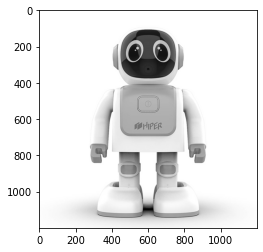

In [4]:
robot= cv2.imread('/home/qwe/Desktop/анализ изображений/robot.jpg')
robot = cv2.cvtColor(robot, cv2.COLOR_RGB2GRAY)
print_img(robot)

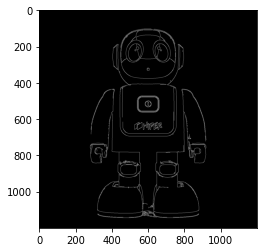

(array([[[ 738, 1140]],

       [[ 772, 1140]]], dtype=int32), array([[[ 679, 1140]],

       [[ 704, 1140]]], dtype=int32), array([[[ 495, 1140]],

       [[ 522, 1140]]], dtype=int32), array([[[ 430, 1140]],

       [[ 463, 1140]]], dtype=int32), array([[[ 775, 1139]],

       [[ 792, 1139]]], dtype=int32), array([[[ 668, 1139]],

       [[ 676, 1139]]], dtype=int32), array([[[ 409, 1139]],

       [[ 426, 1139]]], dtype=int32), array([[[ 661, 1138]],

       [[ 666, 1138]]], dtype=int32), array([[[ 394, 1138]],

       [[ 406, 1138]]], dtype=int32), array([[[ 542, 1137]],

       [[ 541, 1138]],

       [[ 535, 1138]],

       [[ 534, 1139]],

       [[ 525, 1139]],

       [[ 534, 1139]],

       [[ 535, 1138]],

       [[ 541, 1138]],

       [[ 542, 1137]],

       [[ 546, 1137]]], dtype=int32), array([[[ 381, 1137]],

       [[ 391, 1137]]], dtype=int32), array([[[ 370, 1136]],

       [[ 379, 1136]]], dtype=int32), array([[[ 877, 1121]],

       [[ 872, 1126]],

       [[ 871, 

In [5]:
b = robot.copy()
#b = cv2.GaussianBlur(b, (3, 3), 0)
thresh = cv2.Canny(b, 30, 200)#cv2.threshold(belyash,200,255,0)
print_img(thresh)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
print(contours); print(hierarchy)

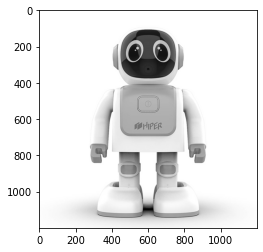

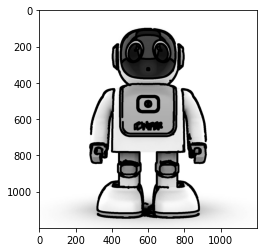

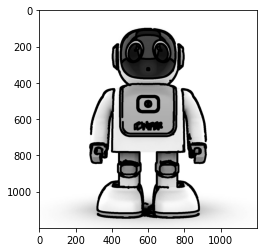

In [6]:
bb = robot.copy()
img = cv2.drawContours(bb, contours, -1, (0,0,255), 9)
print_img(robot)
print_img(img)
print_img(bb)

# Задание 1
На нарисованном вами при выполнении лабораторной работы 2 изображении найти выделить контуры всех прямоугольников синим цветом, круглых фигур – зеленым цветом. Используя моменты, посчитать и вывести площадь и периметр любого из указанных прямоугольников.

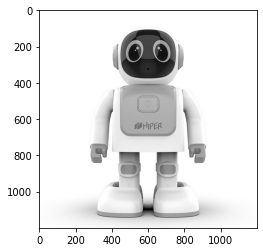

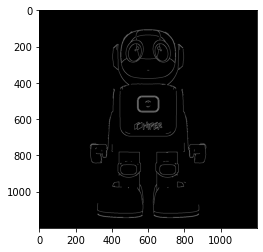

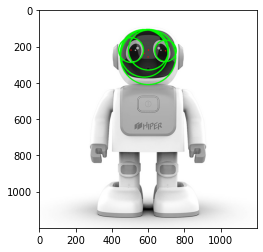

In [7]:
img = cv2.imread('/home/qwe/Desktop/анализ изображений/robot.jpg',0)
thresh = cv2.Canny(img, 150, 200)
print_img(img)
print_img(thresh)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(thresh,cv2.HOUGH_GRADIENT,1,30,param1=40,param2=80)
#print(circles)
circles = np.uint16(np.around(circles))
#print(circles)
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),5)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
print_img(cimg)
#cv2.imshow('detected circles',cimg)

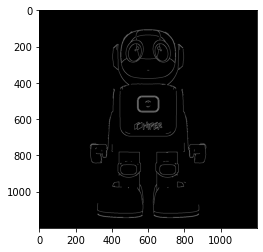

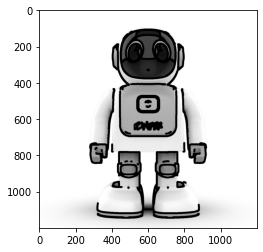

4.5 6.414213538169861 9.41421353816986
2.0 4.2426406145095825 5.656854152679443
6.5 10.0 11.41421353816986
4.0 6.656854152679443 7.656854152679443
814.0 108.4558435678482 117.4558435678482
804.0 89.11269760131836 115.11269760131836
816.0 119.69848418235779 121.11269772052765
805.0 111.11269760131836 115.11269760131836
1.0 8.828427076339722 10.828427076339722
0.5 3.414213538169861 6.2426406145095825
0.5 5.2426406145095825 6.2426406145095825
13.0 180.53910398483276 181.53910398483276
29.5 256.5218586921692 257.5218586921692
5.0 39.89949452877045 46.97056233882904
4331.0 253.71067655086517 256.7106765508652
4298.0 248.36753106117249 254.36753106117249
4324.0 255.71067667007446 256.71067667007446
4294.0 246.36753129959106 254.36753129959106
0.0 3.414213538169861 4.828427076339722
0.0 4.828427076339722 6.828427076339722
0.5 8.41421353816986 9.41421353816986
0.0 3.8284270763397217 4.828427076339722
0.5 5.2426406145095825 6.2426406145095825
0.0 5.828427076339722 8.828427076339722
0.0 3.828427

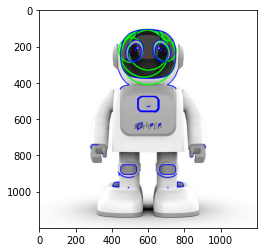

In [8]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print_img(thresh)

bb = img.copy()
bbb = cv2.drawContours(bb, contours, -1, (0,0,255), 9)
print_img(bbb)

contour_list = []
for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.07 * cv2.arcLength(contour, True), True)
    area = cv2.contourArea(contour)
    if len(approx) == 4:
        M = cv2.moments(contour)
        perimeter = cv2.arcLength(contour, False) # в пикселях
        perimeter1 = cv2.arcLength(contour, True)
        print(M['m00'],perimeter,perimeter1)
        contour_list.append(contour)

cv2.drawContours(cimg, contour_list,  -1, (255, 0, 0), 4)
print_img(cimg)

# Задание 2
НА произвольном изображении для любой невыпуклой фигуры найти и нарисовать выпуклый контур (Convex Hull), а также дефекты этого контура (Convexity Defects). Около любых непрямоугольных объектов описать: прямоугольник наименьшей площади, круг и эллипс, нарисовать ось этой фигуры.

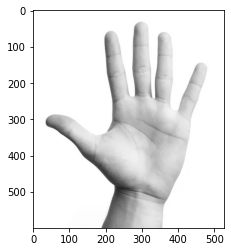

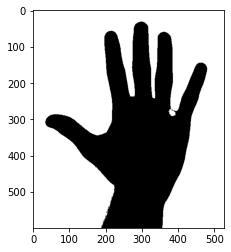

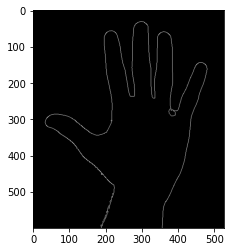

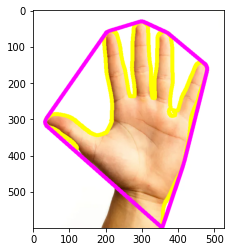

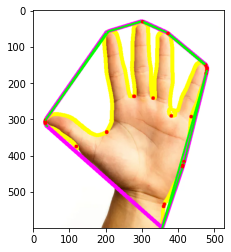

rectangle


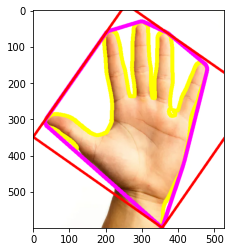

circle


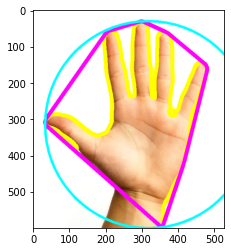

ellipse


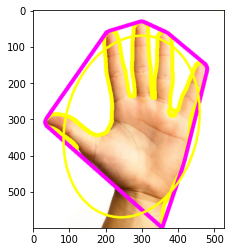

ось


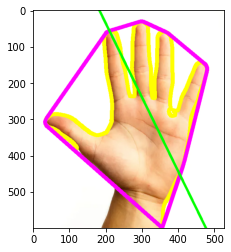

In [9]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

#
# 6.2 Рисуем Контуры
#
import argparse
import random as rng
rng.seed(12345)
img = cv2.imread('/home/qwe/Desktop/анализ изображений/star.jpg')
img1 = cv2.cvtColor(img, cv.COLOR_BGR2GRAY)
print_img(img1)
ret,src_grey = cv2.threshold(img1, 241,255, cv2.THRESH_BINARY)

print_img(src_grey)
canny_output = cv.Canny(src_grey, 150, 200)
print_img(canny_output)
contours, hierarchy = cv.findContours(canny_output.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)


cnt = contours[12]
cv.drawContours(img, [cnt], -1, (0, 255, 255), 10)
cv.drawContours(img, [cv.convexHull(cnt)], -1, (255, 0, 255), 10)
print_img(img)


#print(len(contours))

#print(contours)


# Дефекты
img1 = img.copy()
contours, hierarchy =cv.findContours(canny_output.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
#print(contours)
cnt = contours[12]
hull = cv.convexHull(cnt, returnPoints=False)
hull[::-1].sort(axis=0)
defects = cv.convexityDefects(cnt, hull)
#print(defects)
for i in range(defects.shape[0]):
    s, e, f, d = defects[i, 0]
    start = tuple(cnt[s][0])
    end = tuple(cnt[e][0])
    far = tuple(cnt[f][0])
    cv.line(img1, start, end, [0, 255, 0], 3)
    cv.circle(img1, far, 5, [0, 0, 255], -1)
    
print_img(img1)

# Прямоугольник минимальной площади вокруг фигуры

rect = cv.minAreaRect(cnt)
box = np.int0(cv.boxPoints(rect))
img1 = img.copy()
cv.drawContours(img1, [box], 0, (0, 0, 255), 5)
print('rectangle')
print_img(img1)

# Круг

(x, y), radius = cv.minEnclosingCircle(cnt)
center = (int(x), int(y))
radius = int(radius)
img1 = img.copy()
cv.circle(img1, center, radius, (255, 255, 0), 5)
print("circle")
print_img(img1)

# Эллипс
ellipse = cv.fitEllipse(cnt)
img1 = img.copy()
cv.ellipse(img1, ellipse, (0, 255, 255), 5)
print("ellipse")
print_img(img1)

# Ось
img1 = img.copy()
rows, cols = img.shape[:2]
[vx, vy, x, y] = cv.fitLine(cnt, cv.DIST_L2, 0, 0.01, 0.01)
lefty = int((-x * vy / vx) + y)
righty = int(((cols - x) * vy / vx)+y)
cv.line(img1, (cols-1, righty), (0, lefty), (0, 255, 0), 5)
print("ось")
print_img(img1)



# Задание 3
 Найти наибольший по площади контур, описывающий только внутренности вагона на изображении railway_carriage.jpg (у преподавателя).

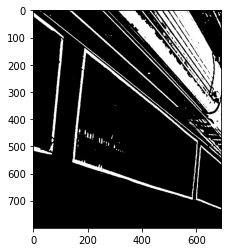

94
[129  93  95  -1]


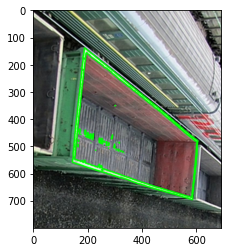

In [10]:


img = cv2.imread('/home/qwe/Desktop/анализ изображений/railway_carriage.jpg', 0)
ret, thresh = cv.threshold(img, 175, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_EXTERNAL+cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
print_img(thresh)

img = cv2.imread('/home/qwe/Desktop/анализ изображений/railway_carriage.jpg')

max_area = 0
number_area = 0
for i in range(0, len(contours)):
    if cv.contourArea(contours[i]) > max_area:
        max_area = cv.contourArea(contours[i])
        number_area = i

cv.drawContours(img, contours, number_area, (0, 255, 0), 3, cv.LINE_AA, hierarchy, 3)
print(number_area)
print(hierarchy[0][number_area])


print_img(img)